# My Financial Analysis

7/3/2020  
# Project Background
This is my first attempt at doing any "financial analysis". In this code, I pull historical stock data to understand historical best and worst day returns, look at returns standard deviations to estimate volatility and risks, and visualize trends to predict growth or decay of stocks for companies I am interested in.

This is not meant to be a complete financial analysis, and I recommend using this tool only to supplement your own research. 

This code is not polished for presentation. I also leave a lot of notes-to-self and links to websites to document my learnings from this project.  

I'm relatively new at coding and stock analysis myself, but if you're curious to see the result of beginner coding + beginner finance, and interested to get started yourself, I invite you to follow along!

Read my [Medium post here](https://medium.com/analytics-vidhya/beginners-python-financial-analysis-walk-through-part-1-cbc89be80fbe) to see examples on how I've used this code

# Getting Data

You must first install pandas-datareader to use this code. You can install using (**pip install pandas-datareader**)

The pandas-datareader package gets data via remote data access from various internet sources into a pandas DataFrame. The various API's supported by the pandas-datareader package continually change. At the time of writing (7/18/2020), it supported many sources like Stooq, Tiingo and IEX, but not Google Finance or Yahoo Finance. Yahoo Finance was the gold standard for stock data API's until it was shut down in 2017; However, it came back up in 2019. 
[Source](https://towardsdatascience.com/best-5-free-stock-market-apis-in-2019-ad91dddec984)

Currently, Yahoo Finance is not officially listed as a supported source in the pandas-datareader [documentation](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html); However, by digging around the [GitHub](https://github.com/pydata/pandas-datareader), I found code still existed to pull from Yahoo finance. This is likely an artifact from years ago when pandas-datareader did support Yahoo. 

Understanding the pros and cons of pandas-datareader: The pandas-datareader package relies on various API's to fetch stock data. In general, the API's may not be stable sources of data. However, through pandas-datareader, the Yahoo Finance API has a few advantages:
1. Adjusted close price stock market data is available. 
2. Most recent stock market data is available
3. Doesn't require API key to fetch the stock market data  
[Source](https://blog.quantinsti.com/stock-market-data-analysis-python/)

*Note: Although I ended up using pandas-datareader for this project, the yfinance package has a lot of utility as well. The yfinance package wraps the new Yahoo Finance API and provides more detailed fundamental data, including minute level stock market data, P/E ratios, revenue, EBIT, income statement, balance sheet, cash flows, and more.
[Source](https://blog.quantinsti.com/stock-market-data-analysis-python/) 

versions  
pd 0.25.0  
np 1.19.1  
matplotlib 3.2.2  
sns 0.9.0  
plotly 4.9.0  
cf 0.17.0  

# Import Statements

In [1]:
# Import all the packages you need

# Pandas-Datareader allows you to pull stock information directly from the internet using different API's
from pandas_datareader import data, wb

# Import the usual packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import datetime

# Plotly Visualization Imports
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [2]:
import plotly.express as px
plotly.__version__

'4.9.0'

In [3]:
# Allows embedding plotly charts into websites
import chart_studio
import chart_studio.plotly as py
username = 'Keithchan10' # your username
api_key = 'JGG4X1eFe7shlxrPN7WB' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

# Data Preparation

In [4]:
# Set the start and end dates for your analysis. The end date is set to current day by default
start_date = '2018-01-01'
end_date = datetime.date.today().strftime('%Y-%m-%d')

# List the ticker symbols you are interested in (as strings) 
tickers = ["SPY", "AAL", "ZM", "NFLX", "FB"]
# tickers = ["AAL", "AAPL", "FB", "AMD", "ZM", "NFLX", "SPY", "VOO", "VXX", "CCL", "JETS","MSFT","CNK", "SPT", "SQ","XOP","NKLA","PTON","APT","FSLY","DDOG","PYPL","TSLA","AMZN"]

# I want to store each df separately to do Bollinger band plots later on
each_df = {}
for ticker in tickers:
    each_df[ticker] = data.DataReader(ticker, 'yahoo', start_date, end_date)

# Concatenate dataframes for each ticker together to create a single dataframe called stocks
stocks = pd.concat(each_df, axis=1, keys = tickers)

# Set names for the multi-index 
stocks.columns.names = ['Ticker Symbol','Stock Info']

In [5]:
# What does the df look like
stocks.head().round(2)

Ticker Symbol     SPY                                                  AAL  \
Stock Info       High     Low    Open   Close      Volume Adj Close   High   
Date                                                                         
2018-01-02     268.81  267.40  267.84  268.77  86655700.0    255.20  53.10   
2018-01-03     270.64  268.96  268.96  270.47  90070400.0    256.81  52.86   
2018-01-04     272.16  270.54  271.20  271.61  80636400.0    257.89  54.40   
2018-01-05     273.56  271.95  272.51  273.42  83524000.0    259.61  52.84   
2018-01-08     274.10  272.98  273.31  273.92  57319200.0    260.09  52.64   

Ticker Symbol                       ...    NFLX                              \
Stock Info       Low   Open  Close  ...    Open   Close    Volume Adj Close   
Date                                ...                                       
2018-01-02     51.90  52.33  52.99  ...  196.10  201.07  10966900    201.07   
2018-01-03     52.06  52.86  52.34  ...  202.05  205.05   8591400    205.05   
2018-01-04     52.27  52.48  52.67  ...  206.20  205.63   6029600    205.63   
2018-01-05     52.43  52.78  52.65  ...  207.25  209.99   7033200    209.99   
2018-01-08     51.93  52.60  52.13  ...  210.02  212.05   5580200    212.05   

Ticker Symbol      FB                                              
Stock Info       High     Low    Open   Close    Volume Adj Close  
Date                                                               
2018-01-02     181.58  177.55  177.68  181.42  18151900    181.42  
2018-01-03     184.78  181.33  181.88  184.67  16886600    184.67  
2018-01-04     186.21  184.10  184.90  184.33  13880900    184.33  
2018-01-05     186.90  184.93  185.59  186.85  13574500    186.85  
2018-01-08     188.90  186.33  187.20  188.28  17994700    188.28  

[5 rows x 30 columns]

# Understanding the Data

In [6]:
# Look at the shape of the data
stocks.shape

(729, 30)

In [7]:
# Looking at the .info() provides a brief summary of the stocks dataframe, including datatypes and memory usage
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 729 entries, 2018-01-02 to 2020-11-20
Data columns (total 30 columns):
(SPY, High)          729 non-null float64
(SPY, Low)           729 non-null float64
(SPY, Open)          729 non-null float64
(SPY, Close)         729 non-null float64
(SPY, Volume)        729 non-null float64
(SPY, Adj Close)     729 non-null float64
(AAL, High)          729 non-null float64
(AAL, Low)           729 non-null float64
(AAL, Open)          729 non-null float64
(AAL, Close)         729 non-null float64
(AAL, Volume)        729 non-null float64
(AAL, Adj Close)     729 non-null float64
(ZM, High)           404 non-null float64
(ZM, Low)            404 non-null float64
(ZM, Open)           404 non-null float64
(ZM, Close)          404 non-null float64
(ZM, Volume)         404 non-null float64
(ZM, Adj Close)      404 non-null float64
(NFLX, High)         729 non-null float64
(NFLX, Low)          729 non-null float64
(NFLX, Open)         729 non-null fl

In [8]:
# Looking at the .describe() method helps me understand the descriptive statistics of my data
stocks.describe().transpose().style.format("{:.2f}")

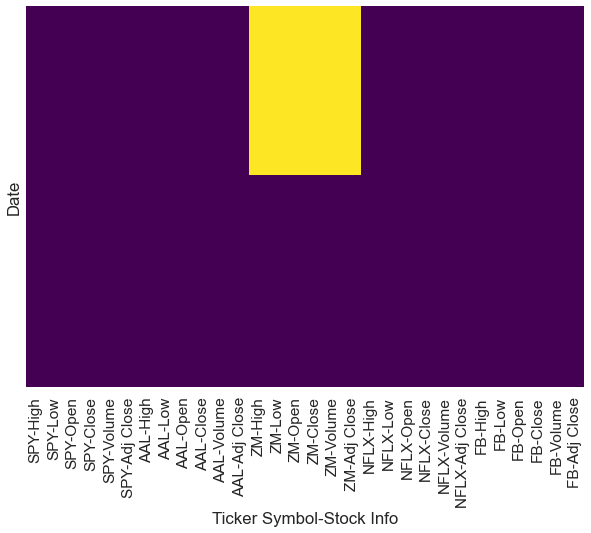

In [9]:
# Visualize missing values in yellow.   
# Missing values could be due to unstable API's or just because a company had not IPO'd yet. 
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
plt.tight_layout()
sns.heatmap(stocks.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Visualizations over time

### Closing Prices

In [10]:
# Create a dataframe for the closing_prices of the stocks
closing_prices_df = stocks.xs(key='Adj Close',axis=1,level=1)

In [11]:
# Using plotly to plot all the stocks over time. This graph shows daily closing prices 
# You can double click on the ticker symbols in the legend to isolate each ticker
# Note: Need version >=4.8 of Plotly.py to plot multiple values for y directly from the initial px.line() call 
fig = px.line(closing_prices_df, x=closing_prices_df.index, y=closing_prices_df.columns, title="Adjusted Closing Prices")
fig.update_layout(hovermode='x',yaxis_title="Price")
fig.show()

In [12]:
# # Save figure to Plotly Chart-Studio 
# py.plot(fig, filename = 'Adjusted Closing Prices 2', auto_open=True)

In [13]:
# # Another method to plot closing prices using plotly's iplot instead of plotly.express
# fig = closing_prices_df.iplot(title='Over Time', yaxis_title="Price", xaxis_title="Date")

C:\Users\80203607\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



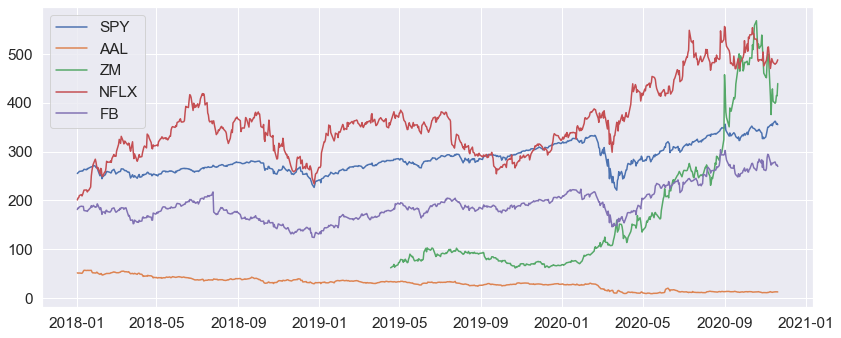

In [14]:
# Using matplotlib (in case Plotly stops working above) to plot all the stocks over time. This graph shows daily closing prices 
fig = plt.figure(figsize=(12,5))
for ticker in tickers:
    plt.plot(stocks[ticker]["Adj Close"])
    plt.legend(tickers)
    
plt.tight_layout()

### Candlestick Chart

Use .iplot(kind='candle') to create a [candlestick chart](https://en.wikipedia.org/wiki/Candlestick_chart). Candlestick charts are a commonly used financial chart to show price movements in stocks

In [15]:
import plotly.graph_objects as go

# User input ticker of interest
ticker = "SPY"

fig = go.Figure(data=[go.Candlestick(x=each_df[ticker].index,
                open=each_df[ticker]['Open'],
                high=each_df[ticker]['High'],
                low=each_df[ticker]['Low'],
                close=each_df[ticker]['Close'])])

fig.update_layout(
    title='Candlestick Chart for ' + ticker,
    yaxis_title='Price',
    xaxis_title='Date',
    hovermode='x'
)
fig.show()

In [16]:
# # Another method to plot candlestick chart using plotly's iplot instead of plotly.express

# # User input ticker of interest
# ticker = "NFLX"

# fig = each_df[ticker][['Open', 'High', 'Low', 'Adj Close']].loc[start_date:end_date].iplot(kind='candle',title="Candlestick Chart",yaxis_title="Price", xaxis_title="Date")

# Returns Analysis

In [17]:
# Look at the adjusted closing prices for each stock
closing_prices_df.head()

Ticker Symbol,SPY,AAL,ZM,NFLX,FB
Date,,,,,
2018-01-02,255.195923,51.647556,NaN,201.070007,181.419998
2018-01-03,256.810028,51.014027,NaN,205.050003,184.669998
2018-01-04,257.892456,51.335667,NaN,205.630005,184.330002
2018-01-05,259.611115,51.316177,NaN,209.990005,186.850006
2018-01-08,260.085846,50.809345,NaN,212.050003,188.279999


In [18]:
# Create a new df called returns that calculates the return after each day.
returns = pd.DataFrame()

In [19]:
# We can use pandas pct_change() method on the 'Adj Close' column to create a column representing this return value. 
for ticker in tickers:
    returns[ticker]=closing_prices_df[ticker].pct_change()*100

In [20]:
returns = returns[:-2]

In [21]:
returns.tail().style.format("{:.4f}")

,SPY,AAL,ZM,NFLX,FB
Date,,,,,
2020-11-12 00:00:00,-0.9701,-2.4917,3.7016,-0.8130,-0.5064
2020-11-13 00:00:00,1.3844,4.2589,-5.8464,-0.8074,0.6798
2020-11-16 00:00:00,1.2483,4.4935,-1.0977,-0.7746,0.7258
2020-11-17 00:00:00,-0.5378,-0.7037,0.6213,0.3193,-1.4196
2020-11-18 00:00:00,-1.2035,0.3150,3.3389,0.2414,-1.1018


In [22]:
returns.mean()

SPY     0.056736
AAL    -0.104379
ZM      0.587451
NFLX    0.157365
FB      0.085516
dtype: float64

### Best and Worst Single Day Returns

In [23]:
# Date of worst single day returns for each company.
worst = returns.idxmin()

In [24]:
# Date of best single day returns for each company.
best = returns.idxmax()

In [25]:
# Create a dataframe to see best and worst day returns by company
best_and_worst_returns = pd.DataFrame({"Worst":worst, "Best":best})
best_and_worst_returns.columns.names = ['Single Day Returns']
best_and_worst_returns.index.names = ['Ticker']
best_and_worst_returns

Single Day Returns,Worst,Best
Ticker,,
SPY,2020-03-16,2020-03-24
AAL,2020-03-18,2020-06-04
ZM,2020-11-09,2020-09-01
NFLX,2020-03-16,2020-08-26
FB,2018-07-26,2019-01-31


# Risk Analysis: Standard deviations

In [26]:
# By looking at the standard deviation of all the returns, we can see which stocks are more volatile
returns.std()#.round(4)

Ticker
SPY     1.462565
AAL     4.277675
ZM      4.846329
NFLX    2.719349
FB      2.423495
dtype: float64

In [27]:
# Looking at the standard deviation over YTD 2020 just to see effect of coronavirus
std_2020 = returns.loc['2020-01-01':'2020-08-01'].std()

# as compared to the same time period in 2019
std_2019 = returns.loc['2019-01-01':'2019-08-01'].std()

In [28]:
# Create a dataframe to compare year to year stdev by company
std_comparison_df = pd.DataFrame({"2019":std_2019, "2020":std_2020})
std_comparison_df.columns.names = ['Std Over Years Comparison']
std_comparison_df.index.names = ['Ticker']
std_comparison_df

Std Over Years Comparison,2019,2020
Ticker,,
SPY,0.762164,2.609858
AAL,2.329343,7.972067
ZM,4.856184,4.796662
NFLX,2.313263,3.055934
FB,1.933728,3.184217


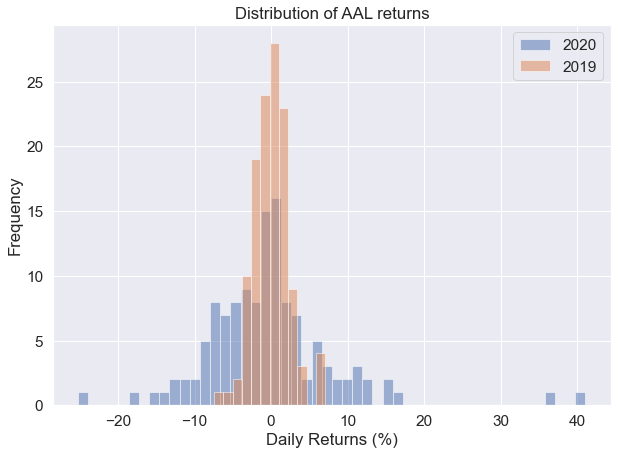

In [29]:
# We can show the distributions of the daily returns using a distribution plot
# User input ticker of interest
ticker = "AAL"

a = returns[ticker].loc['2020-01-03':'2020-07-01'].dropna()
b = returns[ticker].loc['2019-01-03':'2019-07-01'].dropna()

plt.figure(figsize = (10,7))
a.plot(kind='hist', label='2020', bins=50, alpha=0.5)
b.plot(kind='hist', label='2019', bins=12, alpha=0.5)
plt.title('Distribution of ' + ticker + ' returns')
plt.xlabel('Daily Returns (%)')
plt.legend()
plt.show()

# Risk-Return Trade-off

In [30]:
fig = px.scatter(returns, x=returns.mean(), y=returns.std(), text=returns.columns, size_max=60, labels={
                     "x": "Daily Expected Returns (%)",
                     "y": "Risk",
                 },
                title="Stock Risk Vs Returns")
fig.update_xaxes(zeroline=True, zerolinewidth=2, zerolinecolor='Black')#, range=[-0.005, 0.01])
fig.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='Black')#, range=[-0.01, 0.1])
fig.update_traces(textposition='top center')

fig.show()

Text(0, 0.5, 'Risk')

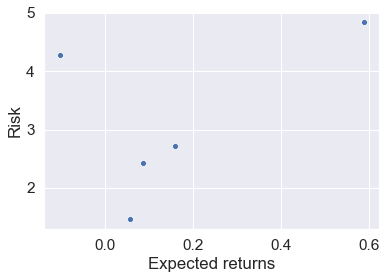

In [31]:
sns.scatterplot(returns.mean(), returns.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
# for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
#     plt.annotate(
#         label, 
#         xy = (x, y), xytext = (20, -20),
#         textcoords = 'offset points', ha = 'right', va = 'bottom',
#         bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
#         arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# Moving Averages

"Moving averages are an important analytical tool used to identify current price trends and the potential for a change in an established trend. The simplest use of a SMA in analysis is using it to quickly identify if a security is in an uptrend or downtrend." 

Source: [Investopedia](https://www.investopedia.com/terms/s/sma.asp)

Another popular, albeit slightly more complex, analytical use is to compare a pair of simple moving averages with each covering different time frames. If a shorter-term simple moving average is above a longer-term average, an uptrend is expected. On the other hand, if the long-term average is above a shorter-term average then a downtrend might be the expected outcome.

Two popular trading patterns that use simple moving averages include the death cross and a golden cross. A death cross occurs when the 50-day SMA crosses below the 200-day SMA. This is considered a bearish signal, that further losses are in store. The golden cross occurs when a short-term SMA breaks above a long-term SMA. Reinforced by high trading volumes, this can signal further gains are in store.

Source: [Investopedia](https://www.investopedia.com/terms/s/sma.asp)

In [32]:
# The cufflinks package has useful technical analysis functionality, and we can use .ta_plot(study='sma') to create a Simple Moving Averages plot

# User input ticker of interest
ticker = "SPY"
start_date = '2018-01-01'
end_date = datetime.date.today().strftime('%Y-%m-%d')
each_df[ticker]['Adj Close'].loc[start_date:end_date].ta_plot(study='sma',periods=[50,200])

# Add formatting like title='Simple Moving Averages', yaxis_title="Price", xaxis_title="Date"

In [33]:
# #Testing out manually creating SMA on plotly.express

# SMA_20 = stocks['AAL']["Close"].loc[start_date:end_date].rolling(window=20).mean()
# fig = px.line(closing_prices_df, x=closing_prices_df.index, y=['AAL', SMA_20], title="Adjusted Closing Prices")

# # fig2 = px.line(SMA_20, x=closing_prices_df.index, y="Close", title='SMA_20')
# # fig.add_trace(fig2.data[0])

# fig.update_layout(hovermode='x',yaxis_title="Price")
# fig.show()

# Technical Analysis Plots

Using the Cufflinks library to create some Technical Analysis plots.

Use .ta_plot(study='boll') to create a [Bollinger Band Plot](https://www.investopedia.com/terms/b/bollingerbands.asp). This link is a pretty good understanding of the principles behind Bollinger Band Plots. I am primarily using this plot to understand undersold vs. oversold stocks. Here's another good [link](https://www.investopedia.com/articles/technical/102201.asp)

In [34]:
# Create Bollinger Band Plots 

# User input ticker of interest
ticker = "SPY"
start_date = '2019-01-01'
end_date = '2020-04-30'
each_df[ticker]['Close'].loc[start_date:end_date].ta_plot(study='boll', periods=20,boll_std=2)

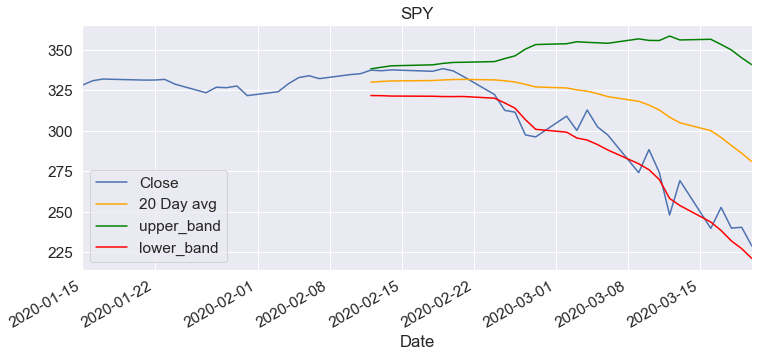

In [35]:
# I added my own bollinger bands plots in case cufflinks ta_plots (currently in beta) stop working
# source: https://ad1m.github.io/derivative/bollinger_bands.html
# Using moving averages, I can filter out some of the noise and focus on trends in the stocks

def bollinger_plot(tick, start_datetime=datetime.datetime(2020,1,1), end_datetime=datetime.date.today(), window=20):
    plt.figure(figsize=(12,5))
    stocks[tick]["Close"].loc[start_datetime:end_datetime].plot(label="Close")
    rolling_mean = stocks[tick]["Close"].loc[start_datetime:end_datetime].rolling(window=window).mean()
    rolling_mean.plot(label=str(window) + " Day avg", color='orange')

    rolling_std = stocks[tick]["Close"].loc[start_datetime:end_datetime].rolling(window=window).std()
    upper_band = rolling_mean + 2*rolling_std
    lower_band = rolling_mean - 2*rolling_std
    upper_band.plot(label="upper_band", color='green')
    lower_band.plot(label="lower_band", color='red')
    
    plt.title(tick)
    plt.legend()
    
bollinger_plot("SPY",datetime.datetime(2020,1,15),datetime.datetime(2020,3,20), window=20)

Putting it all together: Candlestick, SMA, Bollinger Bad plots, plus trading volume  
The Cufflinks package has a pretty nifty QuantFig Class that can add multiple technical analyses to the same plot

In [36]:
start_date = '2018-01-01'
end_date = datetime.date.today().strftime('%Y-%m-%d')

In [37]:
df_of_interest = each_df['SPY']
qf = cf.QuantFig(df_of_interest,title='A Look at the US Economy',legend='top',name='GS',up_color='green', down_color='red')
qf.add_bollinger_bands(periods=20, boll_std=2, colors=['cyan','grey'], fill=True,)
qf.add_volume(name='Volume',up_color='green', down_color='red')
# qf.add_macd()
qf.iplot()

C:\Users\80203607\AppData\Local\Continuum\anaconda3\lib\site-packages\cufflinks\quant_figure.py:149: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



# Future Work

This is just the beginning of this project. Milestone 1. Instead of waiting to show a fully finished product, I think it's important for you to see the journey. In the future, I want to build on this foundation by adding more analytical tools. Furthermore, I want to improve on the data visualization by creating a more user-friendly dashboard that displays all the analysis in an interactive way. 

I hope to add to this analysis as I learn more about coding and finance. Currently, some directions I want to explore include 
- more Technical analysis [source](https://www.investopedia.com/terms/t/technical-analysis-of-stocks-and-trends.asp#:~:text=Technical%20analysis%20is%20the%20study,data%2C%20including%20price%20and%20volume.&text=The%20two%20most%20common%20forms,needed%20to%20make%20a%20profit.)
- adding trendlines to candestick plots
- Fundamental analysis using yfinance
- Learning Dash or using PowerBI to create a user-friendly dashboard


Also look at using Dash as a landing spot for the final output of this program: https://dash.plotly.com/introduction